<a href="https://colab.research.google.com/github/shekharkoirala/machinelearning_algorithms_analysis/blob/master/bestfitline/Finding_Best_Fit_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION ANALYSIS

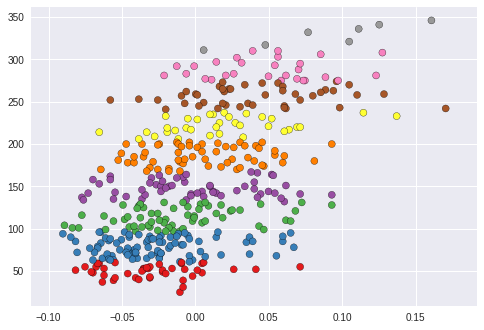

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Plot the training points
plt.scatter(diabetes_X_train,diabetes_y_train, c=diabetes_y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

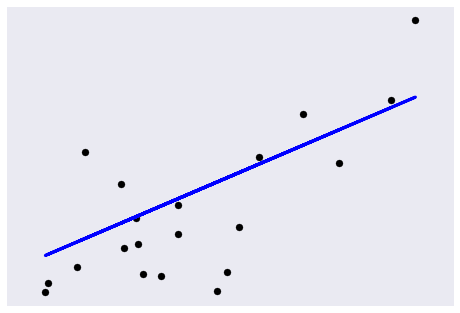

In [25]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
                      
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


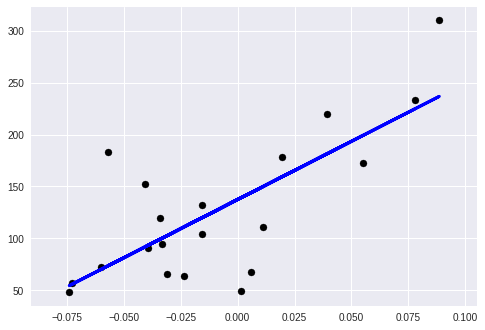

In [26]:
#############TUNINUG##########################
#ref: http://pavelbazin.com/post/linear-regression-hyperparameters/
def ordinary_least_squares(x, y):
    '''
    Find weights for a hypothesis of the form:
        w*x + b
    using ordinary least squares method where
    w defined as b0, b as b1 by convention.
    
    Params:
        x: training data values
        y: training data lables
    
    Returns:
        hypothesis function
    '''    
    xmean = np.mean(x)
    ymean = np.mean(y)

    m = len(x)
    
    numerator = 0
    denominator = 0

    for i in range(m):
        numerator += (x[i] - xmean) * (y[i] - ymean)
        denominator += (x[i] - xmean)**2
    
    b1 = numerator / denominator
    b0 = ymean - (b1 * xmean)
    
    # b1 and b0 are np arrays -> extract their actual values
    b = b0[0]
    w = b1[0]
    
    return lambda x: w*x + b

hypothesis = ordinary_least_squares(diabetes_X_test, diabetes_y_test)
prediction = hypothesis(diabetes_X_test)
prediction = prediction.reshape((20,))


plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, prediction, color='blue', linewidth=3)


# LINEAR REGRESSION TENSORFLOW

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 50 : cost = 8033.198 W = 899.02997 b = 135.55994
Epoch 100 : cost = 8033.363 W = 899.0776 b = 135.5608
Epoch 150 : cost = 8033.363 W = 899.0776 b = 135.5608
Epoch 200 : cost = 8033.363 W = 899.0776 b = 135.5608
Training cost = 8033.363 Weight = 899.0776 bias = 135.5608 



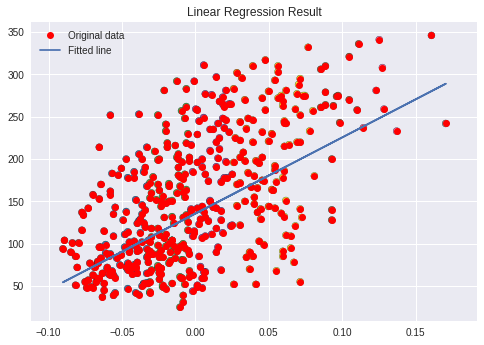

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
x = diabetes.data[:, np.newaxis, 2]
y = diabetes.target


# Plot the training points
plt.scatter(x,y, c=x, cmap=plt.cm.Set1,
            edgecolor='k')

import tensorflow as tf
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.1
training_epochs = 200

# Hypothesis 
n = len(x)
y_pred = tf.add(tf.multiply(X, W), b) 
  
cost = tf.reduce_mean(tf.square(y_pred - Y))
# Mean Squared Error Cost Function 
# cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X : x, Y : y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 
    
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 